1. 06_Data 폴더 안에 있는 데이터를 모두 병합한 후 변수 df3에 할당하고 df3를 활용해서 아래 문제를 해결하시오.
2. 2019년 5월 대비 8월의 "쿠팡출고수량"이 몇 퍼센트 증가했는지 계산하시오.
3. 각 카테고리 별 5월 대비 8월의 "쿠팡출고수량"의 증감율을 계산하시오.
4. '발주가능상태'에서 '발주중단' 된 데이터의 특성을 파악하고자 한다. '발주중단' 데이터만 추출하여, 카테고리의 빈도수를 확인하고, 연속형 자료의 기술통계량을 계산하시오.
5. 19년도 7월 2번째 주에 '쿠팡출고수량'이 가장 많은 '카테고리'는 무엇인지 확인하시오.
6. 각 '자재명' 별 '쿠팡출고수량', '입고수량'의 평균을 계산하고, 계산된 결과에서 '쿠팡출고수량'의 상위 10% '자재명'을 'A' / 상위 30%를 'B' / 상위 60%를 'C' / 나머지를 'D'로 '등급분류'라는 파생변수를 생성하고, 각 등급에서 가장 많이 등장한 '카테고리'항목이 무엇인지 확인하시오.
7. '카테고리'를 사용자로부터 입력받아, '발주가능상태'에 따른 '월'(날짜로 부터 계산) 별 '쿠팡출고수량'의 합을 계산하여 시각화 하고 해당 그래프를 '카테고리명_월별_쿠팡출고량.png'파일 형태로 저장하는 함수를 만드시오.
8. '카테고리'빈도수가 가장 많은 항목의 '입고수량'이 높은 상위 100개 데이터를 result_category.xlsx로 저장하시오.
9. 각 '카테고리'별 7월과 8월의 '평균'과 '합'의 차이를 계산하시오.
10. '입고수량'과 '쿠팡출고수량'의 상관관계를 산점도를 이용해 시각화 하시오.

In [23]:
import pandas as pd
import numpy as np
import os
import koreanize_matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# from google.colab import drive
# drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [47]:
# 1. 06_Data 폴더 안에 있는 데이터를 모두 병합한 후 변수 df3에 할당하고 df3를 활용해서 아래 문제를 해결하시오.
data_path = r"실습 파일/06_Data"
#data_path = r"/gdrive/My Drive/Colab Notebooks/하나로/06_Data"
file_list = os.listdir(data_path)

sample = []
for file in file_list:
    print(file)
    file_path = os.path.join(data_path, file)
    data = pd.read_csv(file_path)  # header를 1로 설정
    sample.append(data)

# 모든 데이터프레임을 합치기
df3 = pd.concat(sample, ignore_index=True)
del df3['Unnamed: 0']
df3

기간발주데이터_1905001.csv
기간발주데이터_1906001.csv
기간발주데이터_1907001.csv
기간발주데이터_1908001.csv


,날짜,SKU ID,SKU 명,바코드,발주가능상태,입고수량,쿠팡출고수량,쿠팡현재재고수량,자재번호,자재명,카테고리,입수,출고수량,재고수량
0,2019-05-16,29349,리큐진한겔일반 3LNEW,8801046893111,발주가능,384,287,5788,6077374,19리큐 진한겔 알카2.7용기(일),세탁세제,4,71.750000,80.668990
1,2019-05-16,29350,리큐 진한겔드럼 3L NEW,8801046893128,발주가능,0,235,2772,6077394,19리큐 진한겔 알카2.7용기(드),세탁세제,4,58.750000,47.182979
2,2019-05-16,29351,울샴푸아웃도어 800ml 용기,8801046878934,발주가능,0,2,35,6077406,19울샴푸아웃도 800ml(리뉴얼),세탁세제,9,0.222222,157.500000
3,2019-05-16,29352,울샴푸아웃도어 1L 일자형 리필,8801046878941,발주가능,207,41,2083,6077404,19울샴푸아웃도 1L(리뉴얼),세탁세제,9,4.555556,457.243902
4,2019-05-16,29359,Pack 2080오리지날칫솔 5+5입_탄력모,8801046888858,발주가능,288,312,3411,5009109,182080오리지날칫솔 5+5입(탄력모),덴탈케어,8,39.000000,87.461538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36828,2019-08-07,10360959,"샤워메이트 보타닉테라스 워시 버베나 1.2kg, 1개",8801046329085,발주가능,8,13,118,6075867,19샤워메이트보타닉테라 1.2Kg버베나(온)책,세탁세제,8,1.625000,72.615385
36829,2019-08-07,10360960,"2080 퓨어 핑크솔트 가글 750ML, 1개",8801046330296,발주가능,12,3,11,6076086,192080가글 핑크솔트750ML(마일드,세탁세제,6,0.500000,22.000000
36830,2019-08-07,10360962,"샤워메이트 보타닉테라스 워시 카렌듈라 1.2kg, 1개",8801046329092,발주가능,64,45,115,6075870,19샤워메이트보타닉테 1.2Kg카렌듈라(온)책,세탁세제,8,5.625000,20.444444
36831,2019-08-07,10365807,스팀클리너 10입 CASE,8801046325315,발주가능,25,8,217,5009289,18스팀클리너 9+1입 CASE,세탁세제,25,0.320000,678.125000


In [86]:
box=[]
for n in range(5,9):
    df = pd.read_csv(f"실습 파일/06_Data/기간발주데이터_190{n}001.csv")
    box.append(df)

df3 = pd.concat(box,ignore_index=True)
del df3['Unnamed: 0']
df3

,날짜,SKU ID,SKU 명,바코드,발주가능상태,입고수량,쿠팡출고수량,쿠팡현재재고수량,자재번호,자재명,카테고리,입수,출고수량,재고수량
0,2019-05-16,29349,리큐진한겔일반 3LNEW,8801046893111,발주가능,384,287,5788,6077374,19리큐 진한겔 알카2.7용기(일),세탁세제,4,71.750000,80.668990
1,2019-05-16,29350,리큐 진한겔드럼 3L NEW,8801046893128,발주가능,0,235,2772,6077394,19리큐 진한겔 알카2.7용기(드),세탁세제,4,58.750000,47.182979
2,2019-05-16,29351,울샴푸아웃도어 800ml 용기,8801046878934,발주가능,0,2,35,6077406,19울샴푸아웃도 800ml(리뉴얼),세탁세제,9,0.222222,157.500000
3,2019-05-16,29352,울샴푸아웃도어 1L 일자형 리필,8801046878941,발주가능,207,41,2083,6077404,19울샴푸아웃도 1L(리뉴얼),세탁세제,9,4.555556,457.243902
4,2019-05-16,29359,Pack 2080오리지날칫솔 5+5입_탄력모,8801046888858,발주가능,288,312,3411,5009109,182080오리지날칫솔 5+5입(탄력모),덴탈케어,8,39.000000,87.461538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36828,2019-08-07,10360959,"샤워메이트 보타닉테라스 워시 버베나 1.2kg, 1개",8801046329085,발주가능,8,13,118,6075867,19샤워메이트보타닉테라 1.2Kg버베나(온)책,세탁세제,8,1.625000,72.615385
36829,2019-08-07,10360960,"2080 퓨어 핑크솔트 가글 750ML, 1개",8801046330296,발주가능,12,3,11,6076086,192080가글 핑크솔트750ML(마일드,세탁세제,6,0.500000,22.000000
36830,2019-08-07,10360962,"샤워메이트 보타닉테라스 워시 카렌듈라 1.2kg, 1개",8801046329092,발주가능,64,45,115,6075870,19샤워메이트보타닉테 1.2Kg카렌듈라(온)책,세탁세제,8,5.625000,20.444444
36831,2019-08-07,10365807,스팀클리너 10입 CASE,8801046325315,발주가능,25,8,217,5009289,18스팀클리너 9+1입 CASE,세탁세제,25,0.320000,678.125000


In [49]:
# 2. 2019년 5월 대비 8월의 "쿠팡출고수량"이 몇 퍼센트 증가했는지 계산하시오.
df3['날짜'] = pd.to_datetime(df3['날짜'])
df3['날짜']

0       2019-05-16
1       2019-05-16
2       2019-05-16
3       2019-05-16
4       2019-05-16
           ...    
36828   2019-08-07
36829   2019-08-07
36830   2019-08-07
36831   2019-08-07
36832   2019-08-07
Name: 날짜, Length: 36833, dtype: datetime64[ns]

In [50]:
df3['월']=df3["날짜"].dt.month
df3[df3['월']==5][['쿠팡출고수량']].sum()

쿠팡출고수량    301973
dtype: int64

In [51]:
df3.groupby("월")[['쿠팡출고수량']].sum()

,쿠팡출고수량
월,
5,301973
6,608557
7,617329
8,141153


In [52]:
a = df3.groupby("월")[['쿠팡출고수량']].sum().loc[5][0]
b = df3.groupby("월")[['쿠팡출고수량']].sum().loc[8][0]
print(((b-a)/a)*100)

-53.2564169644306


In [53]:
a = df3.pivot_table(columns='월', values = '쿠팡출고수량', aggfunc="sum")
a[8]/a[5]

쿠팡출고수량    0.467436
dtype: float64

In [54]:
# 3. 각 카테고리 별 5월 대비 8월의 "쿠팡출고수량"의 증감율을 계산하시오.
sample1 = df3.pivot_table(index='카테고리',columns='월',values='쿠팡출고수량',aggfunc='sum')
sample1['카테고리별 증감율']=((sample1[8]-sample1[5])/sample1[5])*100
sample1

월,5,6,7,8,카테고리별 증감율
카테고리,,,,,
F&B,23687,46424,42573,9905,-58.183814
ST,2442,7805,8383,1615,-33.865684
기타,1647,3644,3215,874,-46.933819
덴탈케어,74280,151319,144956,30661,-58.722402
매입브랜드,1769,2856,2795,635,-64.104014
세탁세제,90089,169955,184832,44910,-50.149297
주방세제,46048,113322,108331,24490,-46.816366
헤어케어,62011,113232,122244,28063,-54.745126


In [55]:
# 4. '발주가능상태'에서 '발주중단' 된 데이터의 특성을 파악하고자 한다.
#'발주중단' 데이터만 추출하여, 카테고리의 빈도수를 확인하고, 연속형 자료의 기술통계량을 계산하시오.
sample2 = df3[df3['발주가능상태']=='발주중단']
sample2.카테고리.value_counts()

카테고리
헤어케어    78
세탁세제    14
덴탈케어     3
Name: count, dtype: int64

In [56]:
sample2[['입고수량','쿠팡출고수량','쿠팡현재재고수량','입수','출고수량','재고수량']].describe()

,입고수량,쿠팡출고수량,쿠팡현재재고수량,입수,출고수량,재고수량
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,14.357895,10.989474,516.526316,7.515789,2.095614,318.160424
std,40.203714,14.443945,938.434514,2.763220,2.906945,399.025974
min,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,0.000000,2.000000,20.500000,4.000000,0.200000,43.036364
50%,0.000000,8.000000,164.000000,10.000000,0.800000,210.000000
75%,0.000000,14.500000,246.000000,10.000000,3.375000,379.307692
max,216.000000,100.000000,3077.000000,10.000000,16.666667,2080.000000


In [57]:
# 5. 19년도 7월 2번째 주에 '쿠팡출고수량'이 가장 많은 '카테고리'는 무엇인지 확인하시오.
df3['주차']=df3['날짜'].dt.isocalendar().week
sample3 = df3[df3['주차']==28]
sample3.groupby('카테고리')[['쿠팡출고수량']].sum()

,쿠팡출고수량
카테고리,
F&B,9139
ST,1913
기타,736
덴탈케어,35045
매입브랜드,598
세탁세제,42675
주방세제,25247
헤어케어,27672


In [58]:
sample3.groupby('카테고리')[['쿠팡출고수량']].sum().idxmax()[0]

'세탁세제'

In [59]:
# 6. 각 '자재명' 별 '쿠팡출고수량', '입고수량'의 평균을 계산하고,
#계산된 결과에서 '쿠팡출고수량'의 상위 10% '자재명'을 'A' / 상위 30%를 'B' /
#상위 60%를 'C' / 나머지를 'D'로 '등급분류'라는 파생변수를 생성하고,
#각 등급에서 가장 많이 등장한 '카테고리'항목이 무엇인지 확인하시오.

sample4 = df3.pivot_table(index='자재명', values=['쿠팡출고수량','입고수량']).sort_values("쿠팡출고수량",ascending=False)
sample4 = sample4.reset_index()
sample4.iloc[:round(351*0.1)]['자재명']


0           17리큐 진한겔 2.1L온라인4입(화)
1          18KS샴푸러블리 605mlX3(쿠팡)책
2          18리큐 진한겔 2.1L(일반)온라인_눕
3      17리큐 진한겔드럼용 2.1L리필(온4입)(화)
4             19KS샴푸데미지 750ml플러스책
5          18전2080클래식 170x5입(인터넷)
6        18전2080스마트 케어 190gx5입(인)
7             18스파크 9.5kg 리필(온라인)
8             19샤워메이트내추럴 1.2kg유자책
9      18전2080뉴샤이닝 140gx5입(인터:측벤)
10        18KS샴푸엘레강스 605mlX3(쿠팡)책
11         17순샘구연산 자몽 1.2L 리필 (친)
12             19KS퍼퓸린스러블리 600ml책
13         17순샘베이킹피톤치드 1.4L리필 (친)
14          19샤워메이트내추럴 1.2kg클린코튼책
15          19KS샴푸두피클리닉 750ml플러스책
16       18전2080퓨어마운틴솔트 핑크120gx3입
17      19KS 샴푸 두피프레쉬쿨 750ml 플러스책
18          182080오리지날칫솔 4+2입 미세모
19             19KS퍼퓸린스블루밍 600ml책
20          19샤워메이트내츄럴 1.2kg 복숭아책
21           19리큐 진한겔 2.1리필(드)6입A
22         182080오리지날칫솔 5+5입(탄력모)
23         17순샘구연산 자몽 1.4L 리필 (친)
24         18전2080청은차청쾌한차 120gx3입
25    18전2080어드밴스캐비티 블루160gx5입(인)
26            19리큐 진한겔 알카2.7용기(드)
27               17투명한 생각 주방 500g
28                17트리오베이킹소다 3L용기
29            

In [60]:
def rank(x):
    if x in sample4.iloc[:round(351*0.1)+1]['자재명'].to_list():
        return "A"
    elif x in sample4.iloc[:round(351*0.3)]['자재명'].to_list():
        return "B"
    elif x in sample4.iloc[:round(351*0.6)]['자재명'].to_list():
        return "C"
    return "D"

df3['등급분류'] = df3['자재명'].apply(rank)

In [61]:
def func(x):
    A=ans['쿠팡출고수량'].quantile(0.9)
    B=ans['쿠팡출고수량'].quantile(0.7)
    C=ans['쿠팡출고수량'].quantile(0.6)
    if x>=A:
        return "A"
    elif x>=B:
        return "B"
    elif x>=C:
        return "C"
    return "D"

ans = df3.pivot_table(index='자재명', values=['쿠팡출고수량','입고수량'])
ans['등급분류'] = ans['쿠팡출고수량'].apply(func)
ans = ans[['등급분류']].reset_index()
ans

,자재명,등급분류
0,10순샘BubbleOlive 350ml용기,B
1,14New바세린리프팅 450ml로션,B
2,14순샘제로만다린.M 1.0L파우치-친환경,D
3,162080 스마트케어웨이브 4입,C
4,162080 스마트케어칫솔_4입,B
...,...,...
346,외2080팔레트 30gx6입(세트),D
347,전2080덴티스트리 나이트리페어 100g(스티,D
348,전2080진지발리스K 진저민트120+20gx3입,D
349,전2080플라워가글 가글재스민 250ml,D


In [62]:
ans2 = df3.merge(ans, on='자재명')
ans2

,날짜,SKU ID,SKU 명,바코드,발주가능상태,입고수량,쿠팡출고수량,쿠팡현재재고수량,자재번호,자재명,카테고리,입수,출고수량,재고수량,월,주차,등급분류_x,등급분류_y
0,2019-05-16,29349,리큐진한겔일반 3LNEW,8801046893111,발주가능,384,287,5788,6077374,19리큐 진한겔 알카2.7용기(일),세탁세제,4,71.75,80.668990,5,20,B,B
1,2019-05-16,2372828,"Box_리큐 진한겔 액상세제 일반용 용기 3L, 4개",18801046893118,발주가능,0,53,482,6077374,19리큐 진한겔 알카2.7용기(일),세탁세제,4,13.25,36.377358,5,20,B,B
2,2019-05-17,29349,리큐진한겔일반 3LNEW,8801046893111,발주가능,112,260,5646,6077374,19리큐 진한겔 알카2.7용기(일),세탁세제,4,65.00,86.861538,5,20,B,B
3,2019-05-17,2372828,"Box_리큐 진한겔 액상세제 일반용 용기 3L, 4개",18801046893118,발주가능,0,33,449,6077374,19리큐 진한겔 알카2.7용기(일),세탁세제,4,8.25,54.424242,5,20,B,B
4,2019-05-18,29349,리큐진한겔일반 3LNEW,8801046893111,발주가능,0,219,5343,6077374,19리큐 진한겔 알카2.7용기(일),세탁세제,4,54.75,97.589041,5,20,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36828,2019-08-03,2383418,Pack_케라시스 볼륨 샴푸 750mlX2+린스 750ml,8801046256213,발주가능,264,26,326,6068195,18KS샴푸볼륨 750X2린750플러스,헤어케어,4,6.50,50.153846,8,31,C,C
36829,2019-08-04,2383418,Pack_케라시스 볼륨 샴푸 750mlX2+린스 750ml,8801046256213,발주가능,0,29,297,6068195,18KS샴푸볼륨 750X2린750플러스,헤어케어,4,7.25,40.965517,8,31,C,C
36830,2019-08-05,2383418,Pack_케라시스 볼륨 샴푸 750mlX2+린스 750ml,8801046256213,발주가능,48,30,315,6068195,18KS샴푸볼륨 750X2린750플러스,헤어케어,4,7.50,42.000000,8,32,C,C
36831,2019-08-06,2383418,Pack_케라시스 볼륨 샴푸 750mlX2+린스 750ml,8801046256213,발주가능,120,31,402,6068195,18KS샴푸볼륨 750X2린750플러스,헤어케어,4,7.75,51.870968,8,32,C,C


In [63]:
pd.crosstab(index = df3['카테고리'],columns=df3['등급분류'])

등급분류,A,B,C,D
카테고리,,,,
F&B,244,871,861,607
ST,0,0,1396,2965
기타,0,168,84,155
덴탈케어,1071,1861,2151,2513
매입브랜드,0,84,373,136
세탁세제,1008,2850,4107,2374
주방세제,1213,1471,908,550
헤어케어,918,1044,2528,2322


In [64]:
pd.crosstab(index = df3['카테고리'],columns=df3['등급분류']).idxmax()

등급분류
A    주방세제
B    세탁세제
C    세탁세제
D      ST
dtype: object

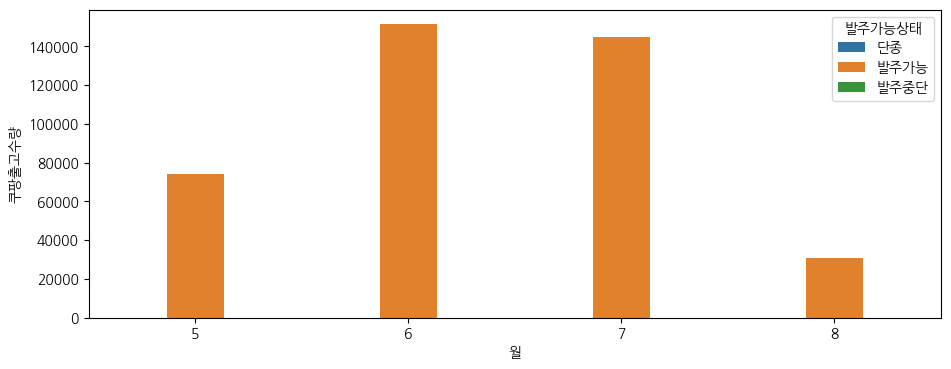

In [73]:
# 7. '카테고리'를 사용자로부터 입력받아, '
#발주가능상태'에 따른 '월'(날짜로 부터 계산) 별 '쿠팡출고수량'의 합을 계산하여 시각화 하고
#해당 그래프를 '카테고리명_월별_쿠팡출고량.png'파일 형태로 저장하는 함수를 만드시오.

import koreanize_matplotlib
import matplotlib.pyplot as plt

df3['월']=df3['날짜'].dt.month

def sum_category(df,category):
    fig = plt.figure(figsize=(11,4))

    sample = df[df['카테고리']==category]
    sample = sample.pivot_table(index=['발주가능상태', '월'], values='쿠팡출고수량'
                                , aggfunc='sum',fill_value=0).reset_index()
    
    sns.barplot(data=sample, x='월', y='쿠팡출고수량',hue='발주가능상태')

#     plt.bar(sample.index, sample['쿠팡출고수량'])
#     plt.xticks(sample.index,sample['월'].astype(str)+'월 '+sample['발주가능상태'])

    plt.savefig(f'생성 파일/{category}_월별_쿠팡출고량.png')


sum_category(df3,'덴탈케어')

In [65]:
# 8. '카테고리'빈도수가 가장 많은 항목의 '입고수량'이 높은 상위 100개 데이터를 result_category.xlsx로 저장하시오.
a = df3['카테고리'].value_counts().index[0] #세탁세제
result = df3[df3['카테고리']==a].sort_values('입고수량',ascending=False).head(100)
result

,날짜,SKU ID,SKU 명,바코드,발주가능상태,입고수량,쿠팡출고수량,쿠팡현재재고수량,자재번호,자재명,카테고리,입수,출고수량,재고수량,월,주차,등급분류
8672,2019-06-03,3031368,Box_리큐 진한겔 액체세제 일반용 리필형 2.1L * 4입,18801046294762,발주가능,9777,1230,21562,6067098,17리큐 진한겔 2.1L온라인4입(화),세탁세제,4,307.500000,70.120325,6,23,A
23694,2019-07-04,3031368,Box_리큐 진한겔 액체세제 일반용 리필형 2.1L * 4입,18801046294762,발주가능,9539,821,16117,6067098,17리큐 진한겔 2.1L온라인4입(화),세탁세제,4,205.250000,78.523752,7,27,A
26242,2019-07-09,3031368,Box_리큐 진한겔 액체세제 일반용 리필형 2.1L * 4입,18801046294762,발주가능,9533,1060,19727,6067098,17리큐 진한겔 2.1L온라인4입(화),세탁세제,4,265.000000,74.441509,7,28,A
31987,2019-07-23,3031368,Box_리큐 진한겔 액체세제 일반용 리필형 2.1L * 4입,18801046294762,발주가능,9488,833,28578,6067098,17리큐 진한겔 2.1L온라인4입(화),세탁세제,4,208.250000,137.229292,7,30,A
34400,2019-07-31,3031368,Box_리큐 진한겔 액체세제 일반용 리필형 2.1L * 4입,18801046294762,발주가능,9480,563,32950,6067098,17리큐 진한겔 2.1L온라인4입(화),세탁세제,4,140.750000,234.103020,7,31,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29826,2019-07-16,3264275,Box_울샴푸 오리지널 리필형 1.5L*4,18801046297503,발주가능,1176,212,2274,6067119,18울샴푸오리지 1.5L*4 (온라인) (화),세탁세제,4,53.000000,42.905660,7,29,A
10626,2019-06-07,489752,Box_스파크 7.5kg(리필)x2입(한박스) 7.5kg 2개입,18801046260873,발주가능,1158,8,1273,6067053,18스파크 리필 7.5kg(온라인),세탁세제,2,4.000000,318.250000,6,23,B
87,2019-05-16,3031369,Box_리큐 진한겔 액체세제 드럼용 리필형 2.1L * 4입,18801046294779,발주가능,1140,331,8129,6066844,17리큐 진한겔드럼용 2.1L리필(온4입)(화),세탁세제,4,82.750000,98.235650,5,20,A
23802,2019-07-04,9236805,Pack_리큐 진한겔 2.1+2.1(일반),8801046318690,발주가능,1137,173,1610,6068208,18리큐 진한겔 2.1+2.1(일반)(온)화,세탁세제,3,57.666667,27.919075,7,27,B


In [19]:
result.to_excel("생성 파일/result_category.xlsx")

In [20]:
# 9. 각 '카테고리'별 7월과 8월의 '평균'과 '합'의 차이를 계산하시오.
sample5 = df3.pivot_table(index='카테고리',columns='월', values='쿠팡출고수량',aggfunc=['mean','sum'])
sample5

mean                                     sum                  \
월              5          6          7          8      5       6       7   
카테고리                                                                       
F&B    43.067273  48.107772  47.198448  59.668675  23687   46424   42573   
ST      2.348077   4.290819   6.241996  10.157233   2442    7805    8383   
기타     20.587500  24.293333  22.482517  25.705882   1647    3644    3215   
덴탈케어   43.035921  49.193433  59.998344  81.113757  74280  151319  144956   
매입브랜드  13.820312  12.471616  14.116162  16.710526   1769    2856    2795   
세탁세제   50.782976  42.141086  48.936193  59.483444  90089  169955  184832   
주방세제   52.446469  71.722785  76.182138  93.473282  46048  113322  108331   
헤어케어   43.003467  43.400537  52.085215  67.785024  62011  113232  122244   

              
월          8  
카테고리          
F&B     9905  
ST      1615  
기타       874  
덴탈케어   30661  
매입브랜드    635  
세탁세제   44910  
주방세제   24490  
헤어케어   28063

In [74]:
sample5['mean'][8]

카테고리
F&B      59.668675
ST       10.157233
기타       25.705882
덴탈케어     81.113757
매입브랜드    16.710526
세탁세제     59.483444
주방세제     93.473282
헤어케어     67.785024
Name: 8, dtype: float64

In [21]:
a = sample5[('mean',7)]
b = sample5[('mean',8)]

c = sample5[('sum',7)]
d = sample5[('sum',8)]

sample5[('mean','diff')] = abs(b-a)
sample5[('sum','diff')] = abs(d-c)
sample5

mean                                     sum                  \
월              5          6          7          8      5       6       7   
카테고리                                                                       
F&B    43.067273  48.107772  47.198448  59.668675  23687   46424   42573   
ST      2.348077   4.290819   6.241996  10.157233   2442    7805    8383   
기타     20.587500  24.293333  22.482517  25.705882   1647    3644    3215   
덴탈케어   43.035921  49.193433  59.998344  81.113757  74280  151319  144956   
매입브랜드  13.820312  12.471616  14.116162  16.710526   1769    2856    2795   
세탁세제   50.782976  42.141086  48.936193  59.483444  90089  169955  184832   
주방세제   52.446469  71.722785  76.182138  93.473282  46048  113322  108331   
헤어케어   43.003467  43.400537  52.085215  67.785024  62011  113232  122244   

                   mean     sum  
월          8       diff    diff  
카테고리                             
F&B     9905  12.470227   32668  
ST      1615   3.915237    6768  
기타       874   3.223365    2341  
덴탈케어   30661  21.115412  114295  
매입브랜드    635   2.594365    2160  
세탁세제   44910  10.547251  139922  
주방세제   24490  17.291145   83841  
헤어케어   28063  15.699809   94181

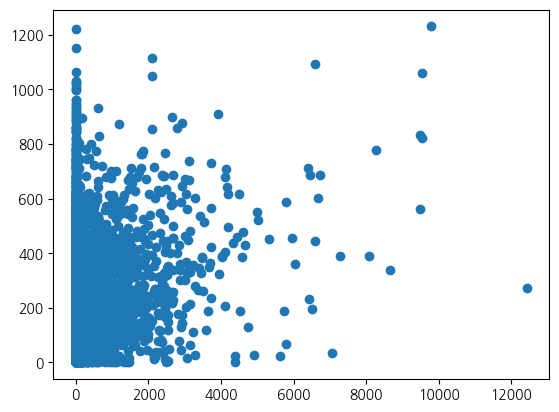

In [22]:
# 10. '입고수량'과 '쿠팡출고수량'의 상관관계를 산점도를 이용해 시각화 하시오.
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(df3['입고수량'],df3['쿠팡출고수량'])

C:\Users\campus2H018\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


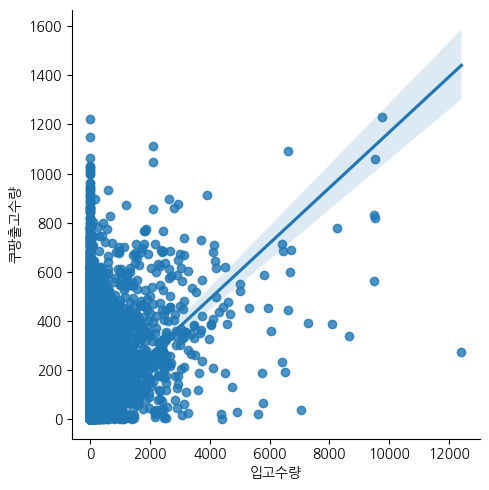

In [75]:
sns.lmplot(data=df3, x='입고수량',y='쿠팡출고수량')